# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
import missingno as mn

# First Glance Data

In [2]:
df=pd.read_csv("./melb_data.csv")

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


In [8]:
for i in df.columns:
    print(df[i].unique())

['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood'
 'Avondale Heights' 'Balaclava' 'Balwyn' 'Balwyn North' 'Bentleigh'
 'Bentleigh East' 'Box Hill' 'Braybrook' 'Brighton' 'Brighton East'
 'Brunswick' 'Brunswick West' 'Bulleen' 'Burwood' 'Camberwell'
 'Canterbury' 'Carlton North' 'Carnegie' 'Caulfield' 'Caulfield North'
 'Caulfield South' 'Chadstone' 'Clifton Hill' 'Coburg' 'Coburg North'
 'Collingwood' 'Doncaster' 'Eaglemont' 'Elsternwick' 'Elwood' 'Essendon'
 'Essendon North' 'Fairfield' 'Fitzroy' 'Fitzroy North' 'Flemington'
 'Footscray' 'Glen Iris' 'Glenroy' 'Gowanbrae' 'Hadfield' 'Hampton'
 'Hampton East' 'Hawthorn' 'Heidelberg Heights' 'Heidelberg West'
 'Hughesdale' 'Ivanhoe' 'Kealba' 'Keilor East' 'Kensington' 'Kew'
 'Kew East' 'Kooyong' 'Maidstone' 'Malvern' 'Malvern East' 'Maribyrnong'
 'Melbourne' 'Middle Park' 'Mont Albert' 'Moonee Ponds' 'Moorabbin'
 'Newport' 'Niddrie' 'North Melbourne' 'Northcote'

# Data Visualization

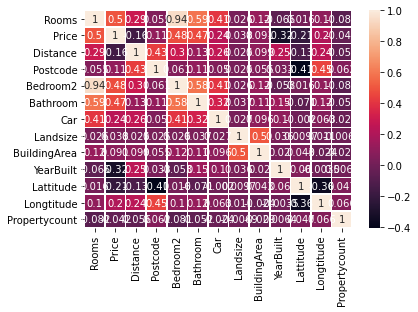

In [9]:
sns.heatmap(df.corr(),annot=True,linewidths=0.6);

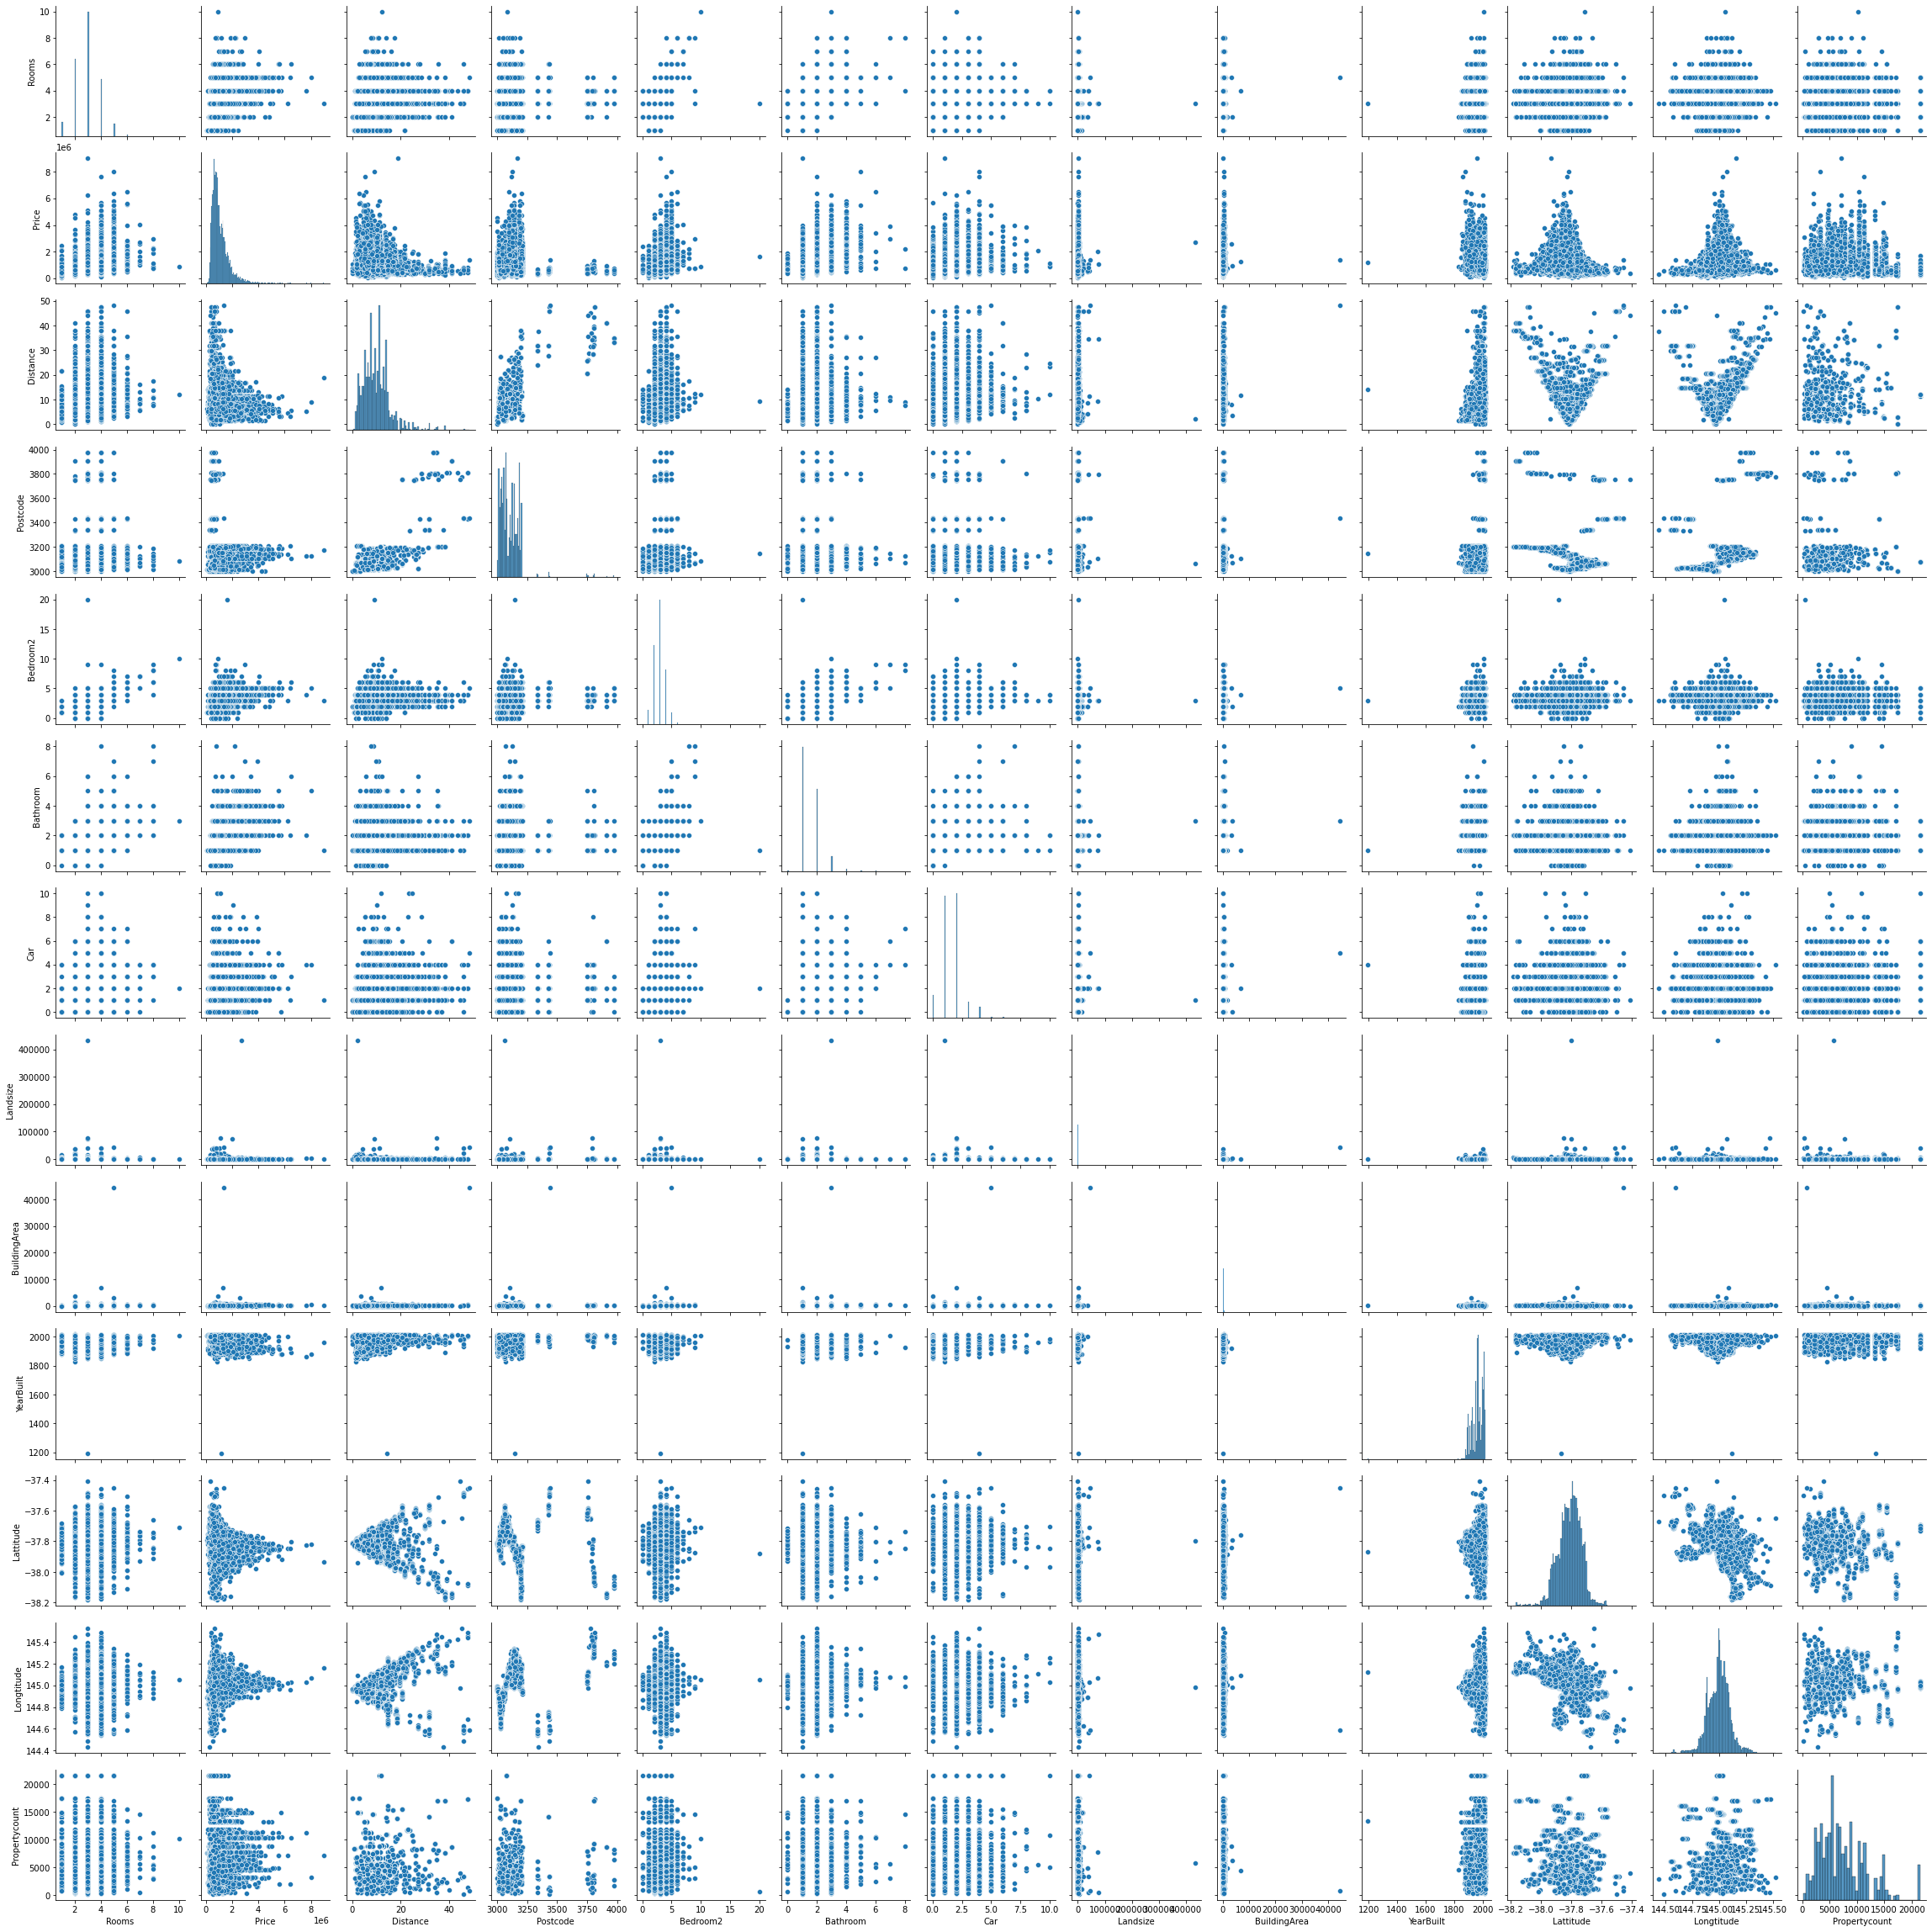

In [10]:
sns.pairplot(df);

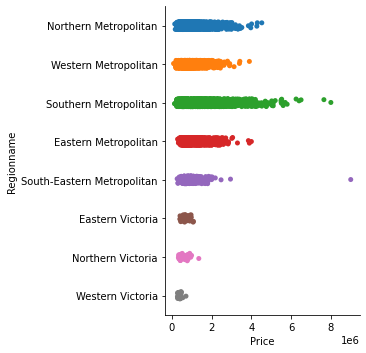

In [11]:
sns.catplot(x="Price",y="Regionname",data=df);

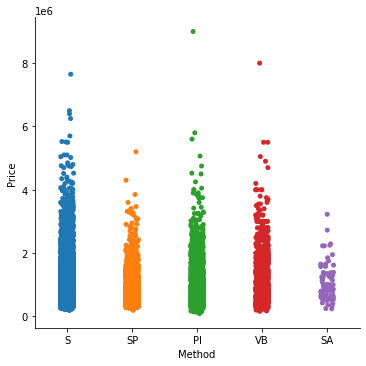

In [12]:
sns.catplot(x="Method",y="Price",data=df);

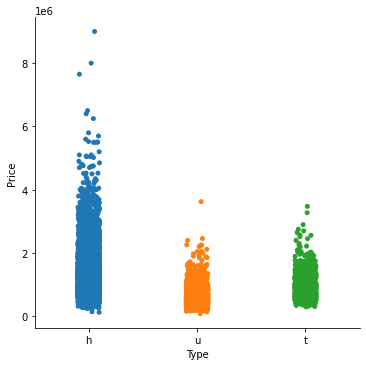

In [13]:
sns.catplot(x="Type",y="Price",data=df);

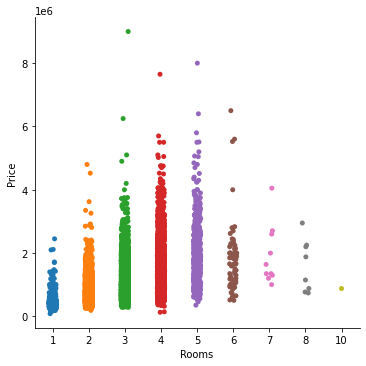

In [14]:
sns.catplot(x="Rooms",y="Price",data=df);

<AxesSubplot:ylabel='Method'>

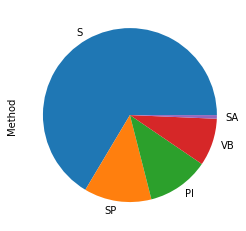

In [15]:
df["Method"].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Type'>

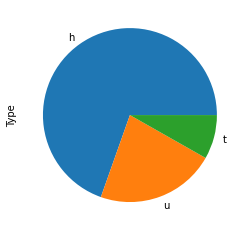

In [16]:
df["Type"].value_counts().plot(kind="pie")

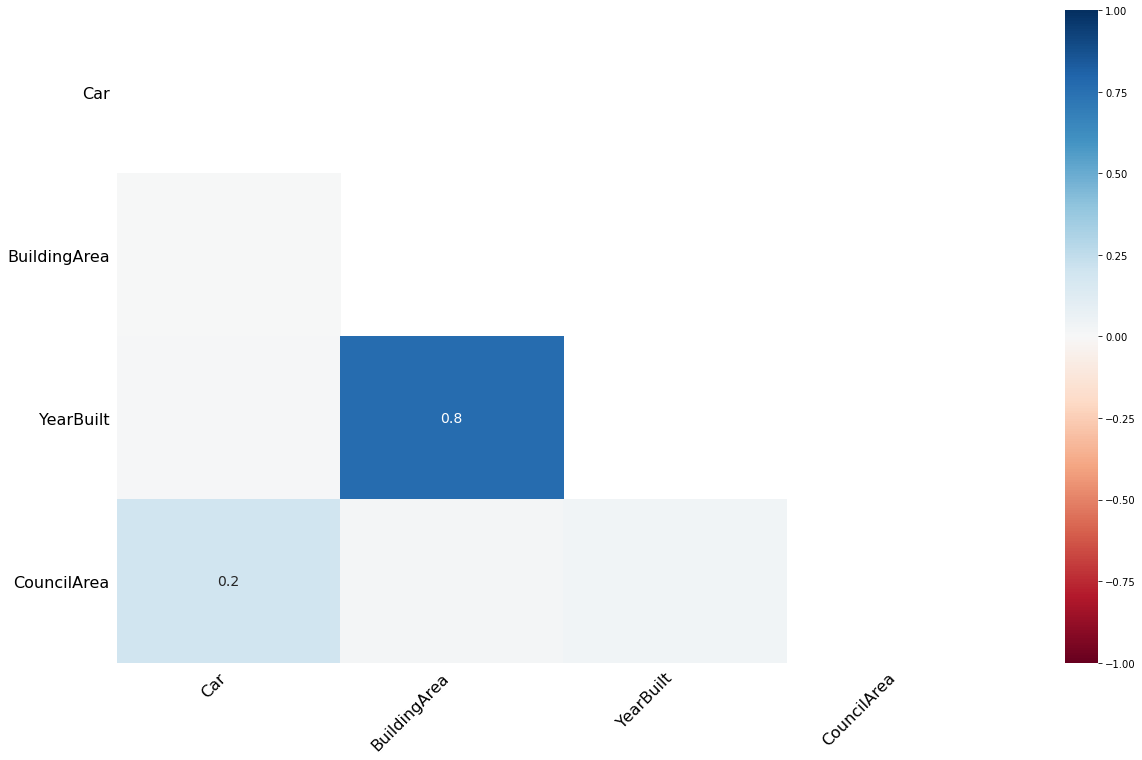

In [17]:
mn.heatmap(df);

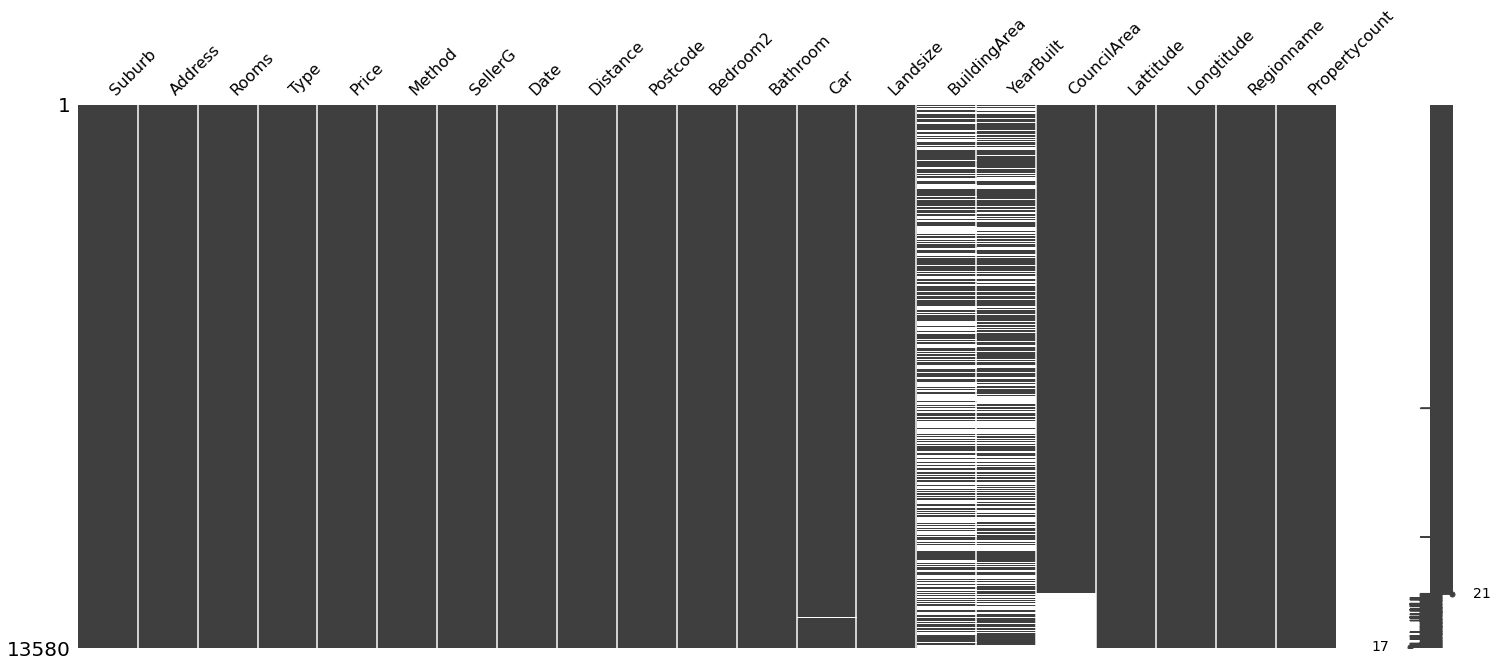

In [18]:
mn.matrix(df);

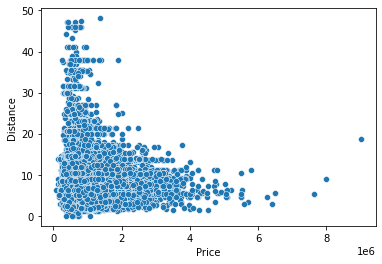

In [19]:
sns.scatterplot(y="Distance",x="Price",data=df);

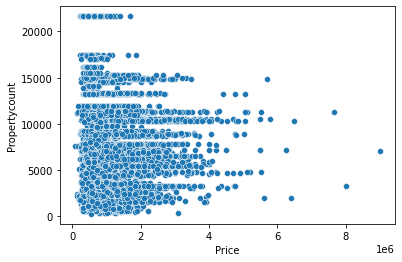

In [20]:
sns.scatterplot(y="Propertycount",x="Price",data=df);

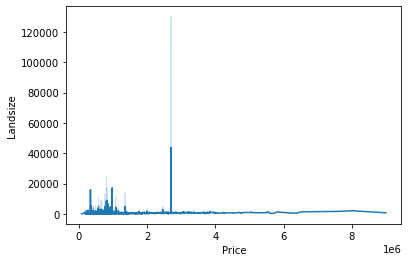

In [21]:
sns.lineplot(x="Price",y="Landsize",data=df);

# Data Preprocessing

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [23]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [24]:
df["YearBuilt"]=df[["YearBuilt"]].fillna(df["YearBuilt"].mean())
df["BuildingAre"]=df[["BuildingArea"]].fillna(df["BuildingArea"].mean())
df["Landsize"]=df[["Landsize"]].fillna(df["Landsize"].mean())
df["Distance"]=df[["Distance"]].fillna(df["Distance"].mean())

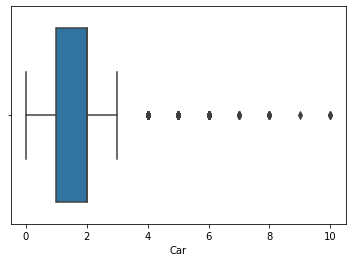

In [25]:
sns.boxplot(x="Car",data=df);

In [26]:
q3=df.Car.quantile(0.75)
q1=df.Car.quantile(0.25)
ıqr=q3-q1
lower=q1-(1.5*ıqr)
upper=q3+(1.5*ıqr)

In [27]:
lower

-0.5

In [28]:
upper

3.5

In [29]:
ıqr

1.0

In [30]:
non_radical=((df["Car"]>=lower) & (df["Car"]<=upper))

In [31]:
df["Car"]=df["Car"][non_radical]

In [32]:
non_radical_mean=df.Car[non_radical].mean()

In [33]:
df["Car"]=df[["Car"]].fillna(non_radical_mean)

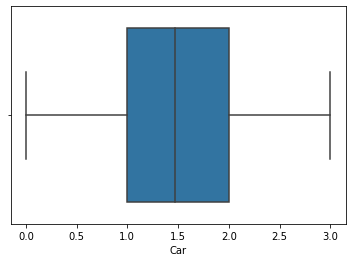

In [34]:
sns.boxplot(x="Car",data=df);

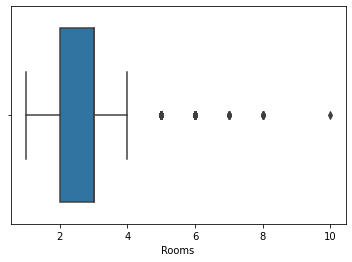

In [35]:
sns.boxplot(x="Rooms",data=df);

In [36]:
q3=df.Rooms.quantile(0.75)
q1=df.Rooms.quantile(0.25)
ıqr=q3-q1
lower=q1-(1.5*ıqr)
upper=q3+(1.5*ıqr)

In [37]:
lower

0.5

In [38]:
upper

4.5

In [39]:
ıqr

1.0

In [40]:
non_radical=((df["Rooms"]>=lower) & (df["Rooms"]<=upper))

In [41]:
df["Rooms"]=df["Rooms"][non_radical]

In [42]:
non_radical_mean=df.Rooms[non_radical].mean()

In [43]:
df["Rooms"]=df[["Rooms"]].fillna(non_radical_mean)

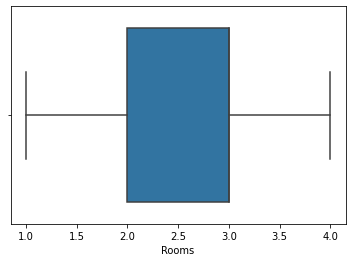

In [44]:
sns.boxplot(x="Rooms",data=df);

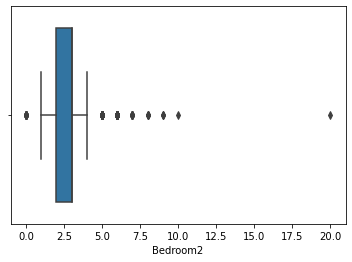

In [45]:
sns.boxplot(x="Bedroom2",data=df);

In [46]:
q3=df.Bedroom2.quantile(0.75)
q1=df.Bedroom2.quantile(0.25)
ıqr=q3-q1
lower=q1-(1.5*ıqr)
upper=q3+(1.5*ıqr)

In [47]:
lower

0.5

In [48]:
upper

4.5

In [49]:
ıqr

1.0

In [50]:
non_radical=((df["Bedroom2"]>=lower) & (df["Bedroom2"]<=upper))

In [51]:
df["Bedroom2"]=df["Bedroom2"][non_radical]

In [52]:
non_radical_mean=df.Bedroom2[non_radical].mean()

In [53]:
df["Bedroom2"]=df[["Bedroom2"]].fillna(non_radical_mean)

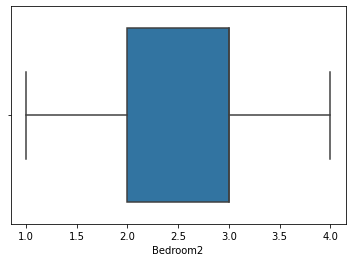

In [54]:
sns.boxplot(x="Bedroom2",data=df);

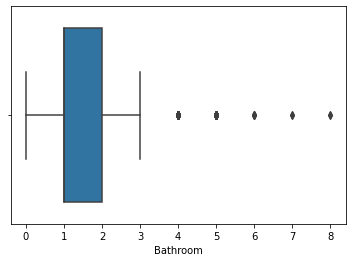

In [55]:
sns.boxplot(x="Bathroom",data=df);

In [56]:
q3=df.Bathroom.quantile(0.75)
q1=df.Bathroom.quantile(0.25)
ıqr=q3-q1
lower=q1-(1.5*ıqr)
upper=q3+(1.5*ıqr)

In [57]:
lower

-0.5

In [58]:
upper

3.5

In [59]:
ıqr

1.0

In [60]:
non_radical=((df["Bathroom"]>=lower) & (df["Bathroom"]<=upper))

In [61]:
df["Bathroom"]=df["Bathroom"][non_radical]

In [62]:
non_radical_mean=df.Bathroom[non_radical].mean()

In [63]:
df["Bathroom"]=df[["Bathroom"]].fillna(non_radical_mean)

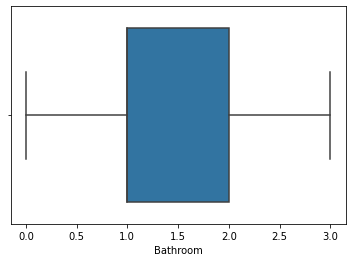

In [64]:
sns.boxplot(x="Bathroom",data=df);

In [65]:
lb=LabelEncoder()

In [66]:
df.Type=lb.fit_transform(df.Type)

In [67]:
y=df["Price"]
X=df[["Rooms","Bedroom2","Bathroom","Car","Type","YearBuilt","Landsize","BuildingArea","Distance"]]

In [68]:
y

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64

In [69]:
X

,Rooms,Bedroom2,Bathroom,Car,Type,YearBuilt,Landsize,BuildingArea,Distance
0,2.0,2.0,1.0,1.000000,0,1964.684217,202.0,NaN,2.5
1,2.0,2.0,1.0,0.000000,0,1900.000000,156.0,79.0,2.5
2,3.0,3.0,2.0,0.000000,0,1900.000000,134.0,150.0,2.5
3,3.0,3.0,2.0,1.000000,0,1964.684217,94.0,NaN,2.5
4,4.0,3.0,1.0,2.000000,0,2014.000000,120.0,142.0,2.5
...,...,...,...,...,...,...,...,...,...
13575,4.0,4.0,2.0,2.000000,0,1981.000000,652.0,NaN,16.7
13576,3.0,3.0,2.0,2.000000,0,1995.000000,333.0,133.0,6.8
13577,3.0,3.0,2.0,1.470794,0,1997.000000,436.0,NaN,6.8
13578,4.0,4.0,1.0,1.470794,0,1920.000000,866.0,157.0,6.8


# ML

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [71]:
lgbm=LGBMRegressor()

In [72]:
lgbm_model=lgbm.fit(X_train,y_train)

In [73]:
y_pred=lgbm_model.predict(X_test)

In [74]:
lgbm_model.score(X_train,y_train)

0.786538025530941

In [75]:
lgbm_model.score(X_test,y_test)

0.7157278164537324

In [76]:
params={"learning_rate":[0.01,0.1,0.5,1],
       "n_estimators":[20,40,100,200,500,1000],
       "max_depth":[1,2,3,4,5,6,7,8,9,10]}

In [77]:
lgbm_=LGBMRegressor()

In [78]:
lgbm_grid=GridSearchCV(lgbm_,param_grid=params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


In [79]:
lgbm_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000}

In [80]:
lgbm_tuning=LGBMRegressor(learning_rate=0.1,
                         max_depth=4,
                         n_estimators=1000).fit(X_train,y_train)

In [81]:
y_pred=lgbm_tuning.predict(X_test)

In [82]:
lgbm_tuning.score(X_train,y_train)

0.8421939838181781

In [83]:
lgbm_tuning.score(X_test,y_test)

0.7176343422070084

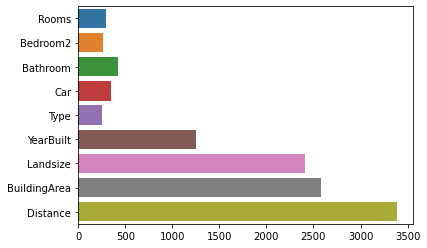

In [84]:
sns.barplot(x=lgbm_tuning.feature_importances_,y=X_train.columns);